<a href="https://colab.research.google.com/github/dmika1234/dl_uwr/blob/develop/Assignments/Assignment2/colab_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import os
import time
from IPython.display import clear_output
from tqdm.auto import tqdm
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.datasets
from torch import nn

In [2]:
# Colab
# %load_ext autoreload
# %autoreload
import httpimport
with httpimport.github_repo(
     "dmika1234", "dl_uwr", "develop"
):
     from Assignments.Assignment2.funs import compute_error_rate, plot_history, create_mnist_loaders, SGD, Model, exp_schedule, div_schedule, div_schedule2, check_if_best, Dropout, train_model, BatchNorm, hyperparameter_tuner, prune_model

In [3]:
# On GPU enabled devices set device='cuda' else set device='cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Data download

In [4]:
batch_size = 128
data_path = "./data"
mnist_loaders = create_mnist_loaders(batch_size=batch_size, data_path=data_path, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/50000 [00:00<?, ?it/s]

<string>:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

### Problem 3

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2137)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

----------------------------------------------------------
After epoch 20 | valid err rate:  1.50% | doing  20 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 13)

-------------------------------------------
Test error rate: 1.670%, training took 24s.
-------------------------------------------


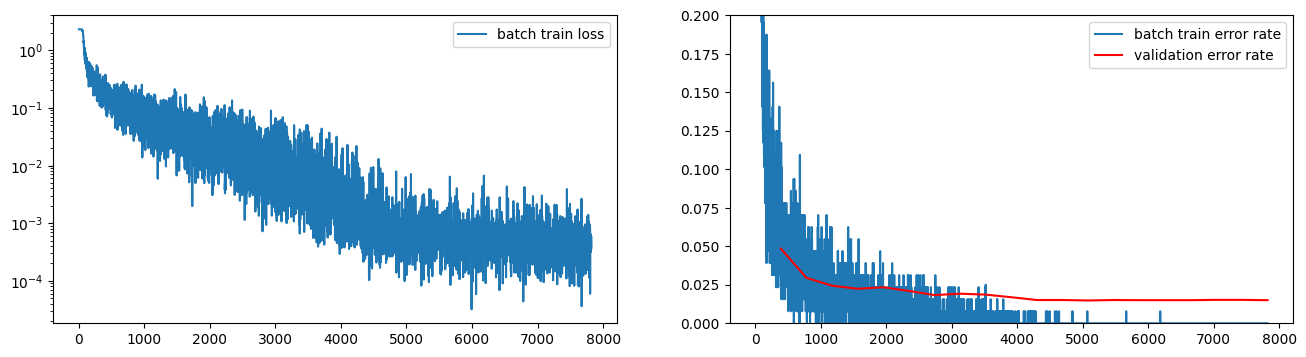

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=None, device=device)

### Conv2d and Maxpool

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2023)
model = Model(nn.Unflatten(-1, (1, 28, 28)),
              nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2),
              nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2),
              nn.Flatten(),
              nn.Linear(64*7*7, 64*7*7),
              nn.ReLU(),
              nn.Linear(64*7*7, 10))
model.init_params_xavier(gain=gain)

----------------------------------------------------------
After epoch 30 | valid err rate:  0.82% | doing  31 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 20)

--------------------------------------------
Test error rate: 0.730%, training took 114s.
--------------------------------------------


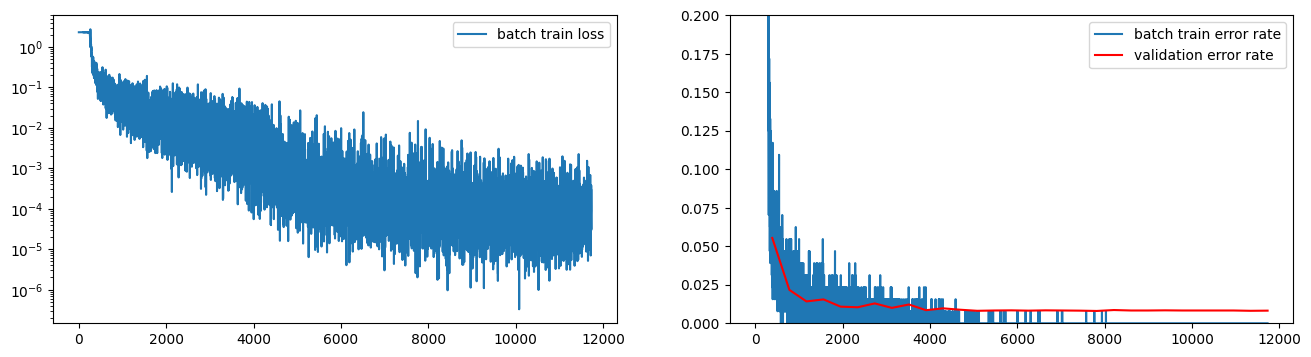

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=None, device=device)

### Droput

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              Dropout(0.66),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

----------------------------------------------------------
After epoch 23 | valid err rate:  1.50% | doing  23 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 15)

-------------------------------------------
Test error rate: 1.450%, training took 33s.
-------------------------------------------


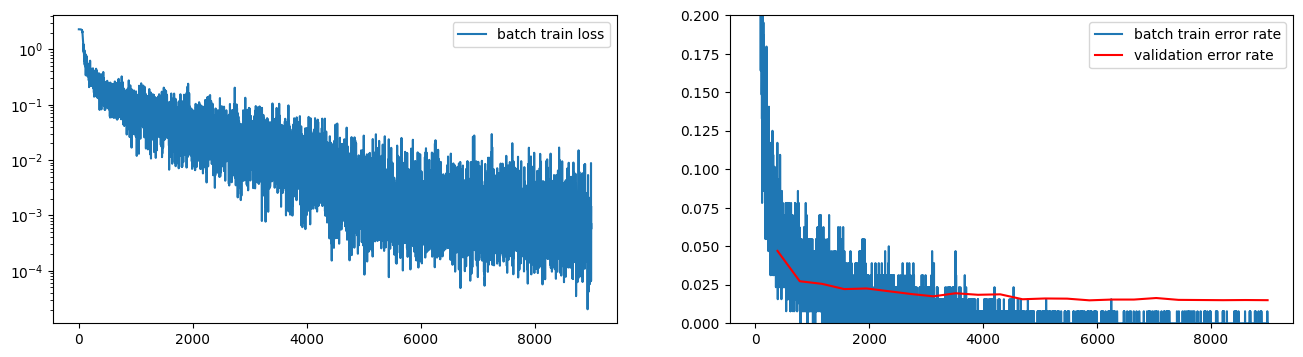

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=None, device=device)

### Data Augmentation

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

transforms_train = torchvision.transforms.Compose([
    torchvision.transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

----------------------------------------------------------
After epoch 30 | valid err rate:  1.05% | doing  40 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 26)

-------------------------------------------
Test error rate: 1.000%, training took 40s.
-------------------------------------------


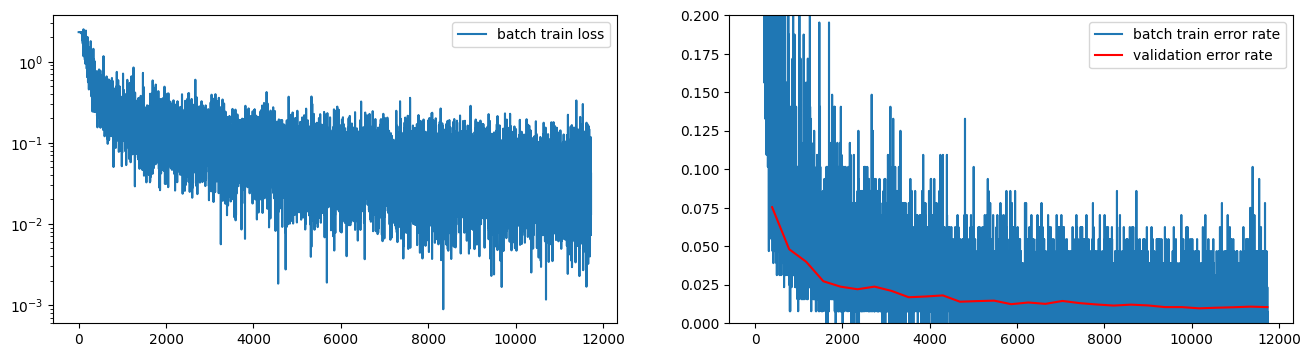

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=transforms_train, device=device)

### Batch normalization

In [ ]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")

torch.manual_seed(2137)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              BatchNorm(hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

----------------------------------------------------------
After epoch 30 | valid err rate:  1.39% | doing  31 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 20)

-------------------------------------------
Test error rate: 1.420%, training took 35s.
-------------------------------------------


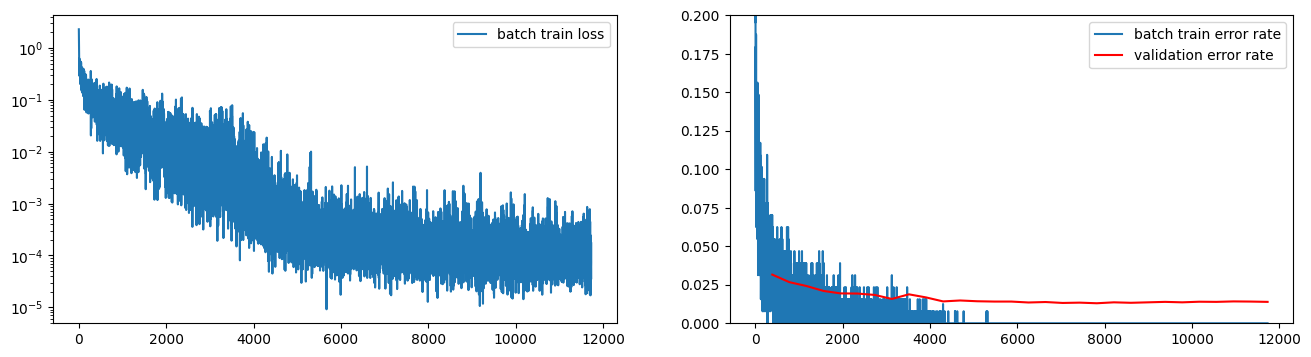

In [ ]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=None, device=device)

### Norm Constraints

In [7]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1
norm_threshold = 5
lr_schedule = (partial(div_schedule2, threshold=12), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

----------------------------------------------------------
After epoch 30 | valid err rate:  1.56% | doing  31 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 20)

-------------------------------------------
Test error rate: 1.540%, training took 38s.
-------------------------------------------


0.0156

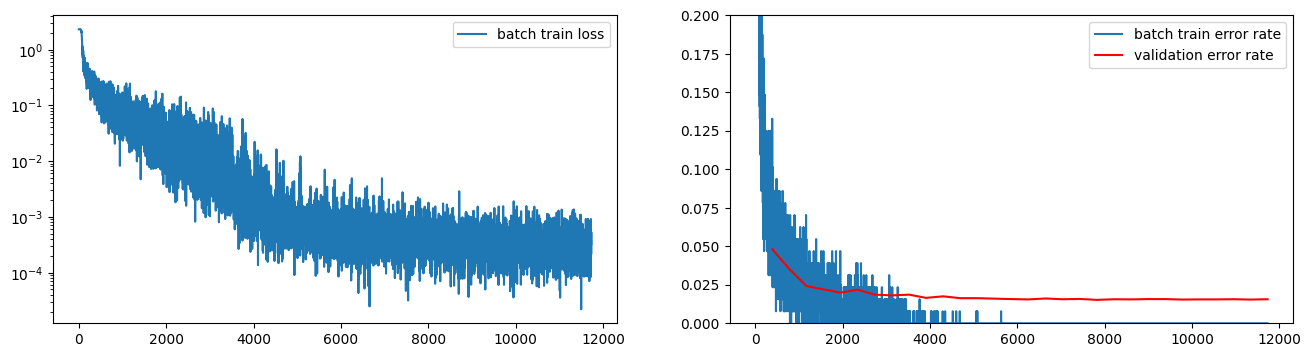

In [8]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=None, device=device, norm_threshold=norm_threshold)

### Hyperparameters tuner

In [5]:
import random

# Define the hyperparameter space
hyperparams = {
    'lr': [0.5, 0.3, 0.25, 0.2, 1e-1, 1e-3, 1e-4],
    'lr_schedule': [(partial(div_schedule2, threshold=12), "epochs"), (partial(div_schedule2, threshold=4), "epochs"),
                    (partial(div_schedule2, threshold=16), "epochs"), (partial(exp_schedule, beta=0.9, warmups=3), "epochs"),
                    (partial(exp_schedule, beta=0.95, warmups=15), "epochs"), (partial(exp_schedule, beta=0.5, warmups=6), "epochs")],
    'momentum': [0.9, 0.95, 0.99],
    'decay': [1, 0.5, 0.1, 1e-2, 1e-3, 0.0],
    'norm_threshold': [10, 5, 1, 0.5, 0.1],
    'num_neurons': [64, 128, 256, 512, 800, 2000],
    'gain': [np.sqrt(2), np.sqrt(3), 1, 2, 0.5, 0.1, 0.01]
}

In [6]:
def hyperparameter_tuner(hyperparams, max_epochs=30, num_trials=100, loaders=mnist_loaders, device='cpu'):
  # Initialize the best validation accuracy and hyperparameters
  best_val_err = 1
  best_hyperparams = None

  # Perform random search
  for i in tqdm(range(num_trials)):
    # Randomly sample hyperparameters
    hyperparam_sample = {k: random.choice(v) for k, v in hyperparams.items()}
    
    # Train the model with the sampled hyperparameters
    model = Model(nn.Linear(28 * 28, hyperparam_sample['num_neurons']),
            nn.ReLU(),
            nn.Linear(hyperparam_sample['num_neurons'], hyperparam_sample['num_neurons']),
            nn.ReLU(),
            nn.Linear(hyperparam_sample['num_neurons'], 10))
    model.init_params_xavier(gain=hyperparam_sample['gain'])
    val_err = SGD(model, loaders, alpha=hyperparam_sample['lr'], epsilon=hyperparam_sample['momentum'], lr_schedule=hyperparam_sample['lr_schedule'],
                  decay=hyperparam_sample['decay'], max_num_epochs=max_epochs,
                    norm_threshold=hyperparam_sample['norm_threshold'], device=device, full_silent=True)

      
      # Record the hyperparameters if they gave the best validation accuracy so far
    if val_err < best_val_err:
        best_val_err = val_err
        best_hyperparams = hyperparam_sample
    
    print(f'Trial {i+1} obtained: val_err={100 * val_err:.2f}%, best_val_err={100 * best_val_err:.f}%')
  return best_val_err, best_hyperparams


Loading best params on validation set (epoch 1)

Trial 5 obtained: val_acc=0.8936, best_val_acc=0.0164


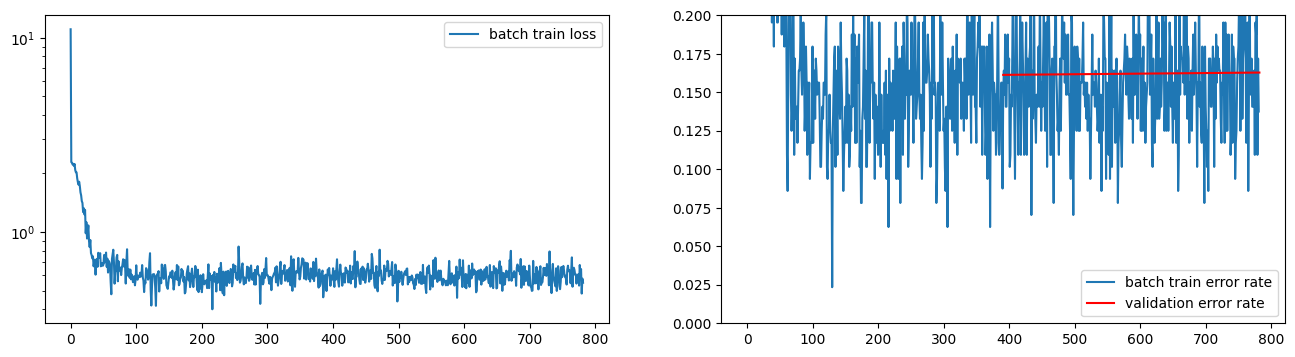

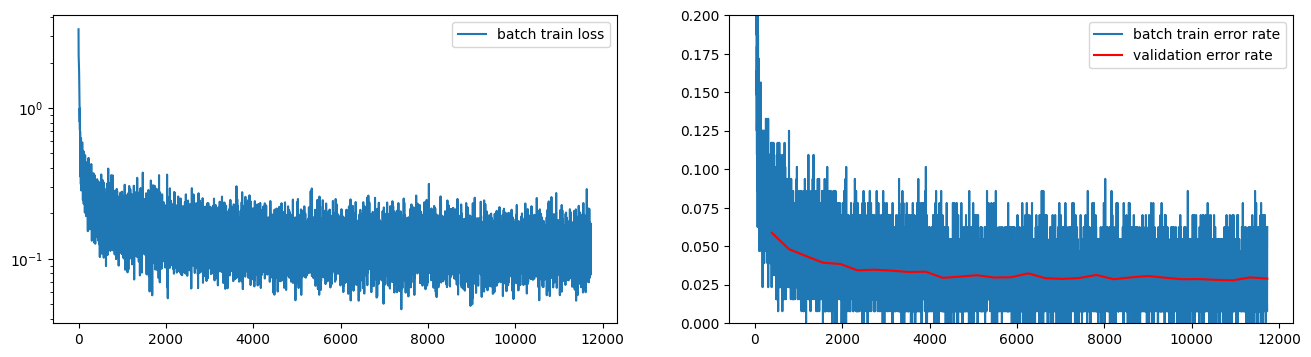

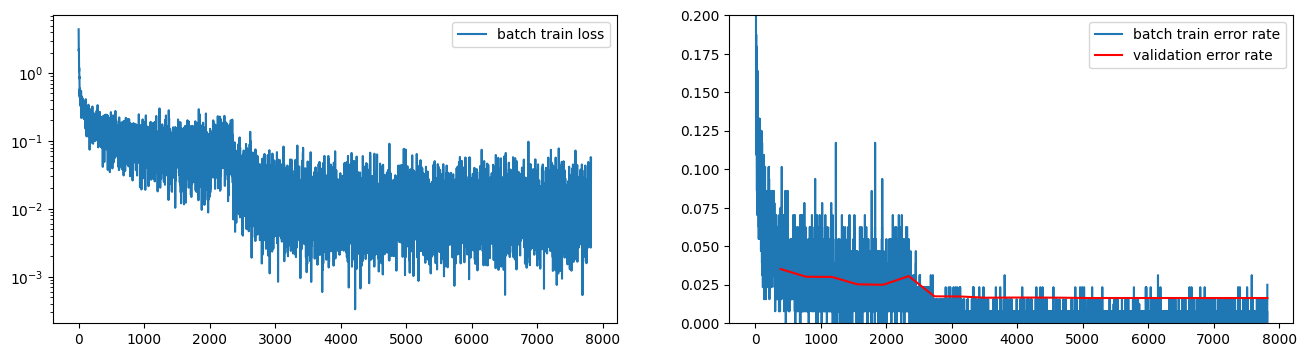

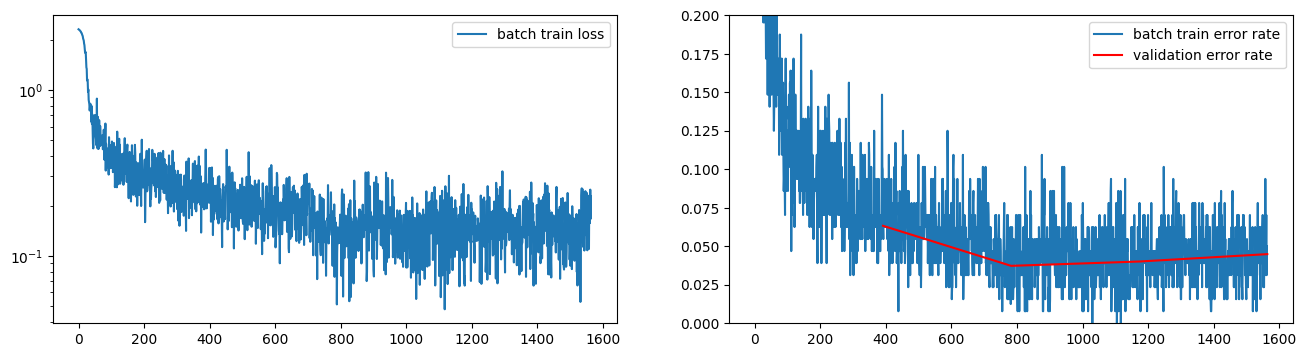

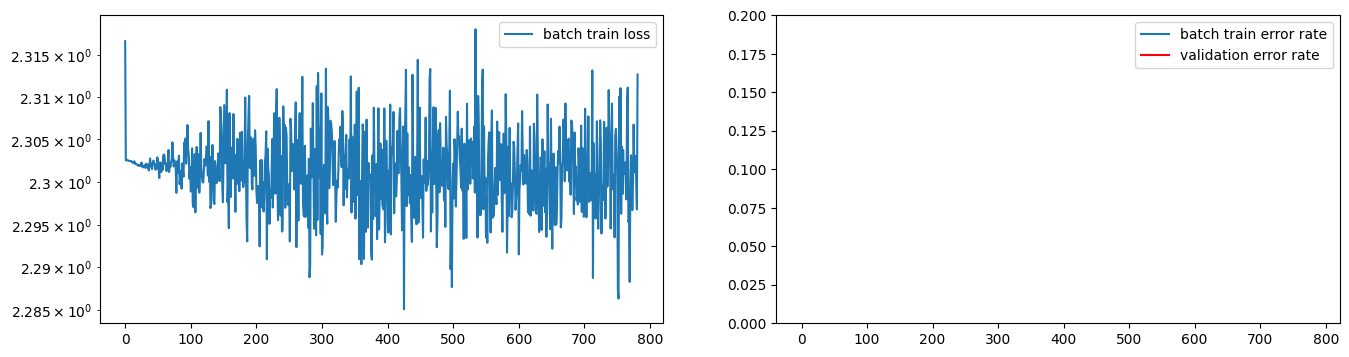

In [7]:
best_val_err, best_hyperparams = hyperparameter_tuner(hyperparams, max_epochs=30, num_trials=5, loaders=mnist_loaders, device=device)

### Pruning

In [43]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 10
hidden_neurons = 800
gain = 0.1
norm_threshold = 5
lr_schedule = (partial(div_schedule2, threshold=12), "epochs")

torch.manual_seed(2023)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

----------------------------------------------------------
After epoch 10 | valid err rate:  1.65% | doing  16 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 10)

-------------------------------------------
Test error rate: 1.630%, training took 13s.
-------------------------------------------


0.0165

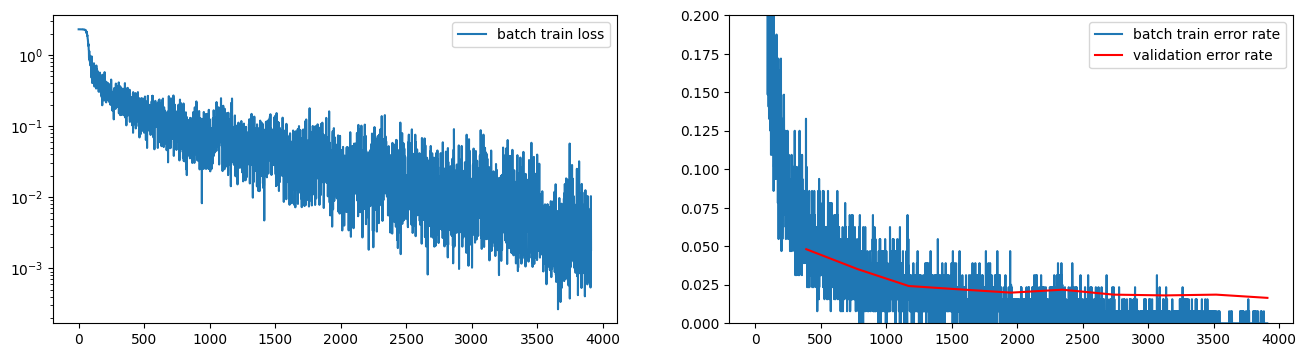

In [44]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs, train_transform=None, device=device, norm_threshold=norm_threshold)

In [45]:
model = prune_model(model, prune_perc=0.2)

----------------------------------------------------------
After epoch 20 | valid err rate:  1.67% | doing  29 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 19)

-------------------------------------------
Test error rate: 1.690%, training took 24s.
-------------------------------------------


0.0167

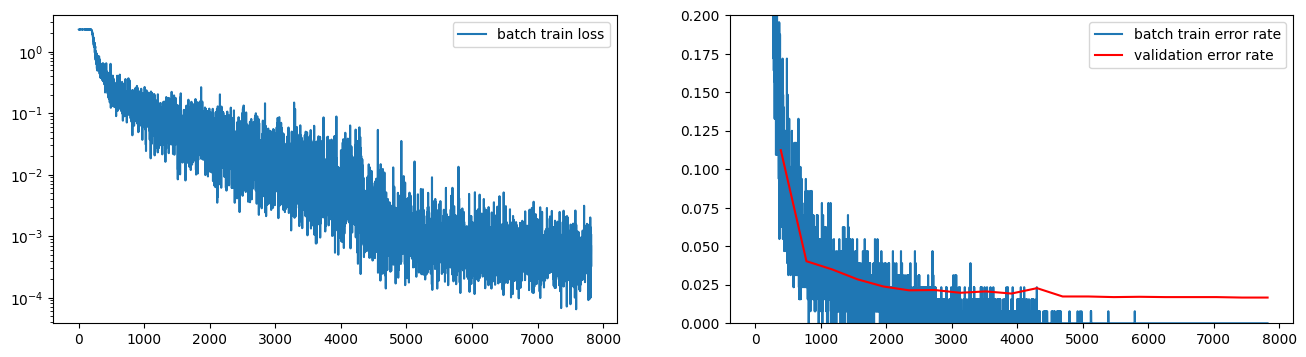

In [46]:
train_model(model, mnist_loaders, alpha, epsilon, lr_schedule, decay, max_num_epochs+10, train_transform=None, device=device, norm_threshold=norm_threshold, pruned=False)

### Extreme Learning Machine

In [77]:
# define transform to normalize data
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,)),
                              ])

# load training and test data
train_data = torchvision.datasets.MNIST(data_path, download=True, train=True, transform=transform)
test_data = torchvision.datasets.MNIST(data_path, download=True, train=False, transform=transform)

In [161]:
X_train, y_train = train_data.data.float(), train_data.targets.float()
X_test, y_test = test_data.data.float(), test_data.targets.float()

In [168]:
class ELM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = torch.randn(input_size, hidden_size, requires_grad=False)
        self.biases = torch.randn(hidden_size, requires_grad=False)
        self.output_weights = torch.randn(hidden_size, output_size, requires_grad=False)
        self.init_params_xavier()

    def forward(self, x):
        x = x.view(x.size(0), -1).float()
        hidden = x @ self.weights + self.biases
        output = hidden @ self.output_weights
        return output
    
    def calculate_output_weights(self, x, y):
        x = x.view(x.size(0), -1).float()
        y = y.float()
        hidden = x @ self.weights + self.biases
        xtx = torch.matmul(hidden.t(), hidden)
        self.output_weights[...] = (torch.inverse(xtx) @ hidden.t() @ y).view(self.hidden_size, self.output_size)

    def init_params_xavier(self, gain=np.sqrt(2)):
        with torch.no_grad():
          nn.init.xavier_uniform_(self.weights, gain=gain)
          nn.init.zeros_(self.biases)


    

In [169]:
elm = ELM(28*28, 100, 1)
elm.calculate_output_weights(X_train, y_train)

In [178]:
pred = elm.forward(X_test)
pred_fin = torch.round(pred).view(pred.size(0))
err = torch.sum(pred_fin != y_test).item() / y_test.size(0)
err

In [185]:
torch.sum(pred_fin != y_test).item() / y_test.size(0)

0.8129